In [161]:
# Import dependencies
import os
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram, find_peaks

# Notes and Chords
## Frenquency tables for notes
- Understand the basical terminology of musical notes
- Understand the connection between frequency and notes

In [162]:

# Human hearing range is [20Hz, 20KHz], let's start from 55Hz, which is 440/2^3=55
curr_freq = 55
freq_list = []

# I want to calculate 8 octaves of notes. Each octave has 12 notes. Looping for 96 steps:
for i in range(96): 
    freq_list.append(curr_freq)
    curr_freq *= np.power(2, 1/12) # Multiplying by 2^(1/12)

#reshaping and creating dataframe
freq_array = np.reshape(np.round(freq_list,1), (8, 12))
cols = ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"]
df_note_freqs = pd.DataFrame(freq_array, columns=cols)
print("NOTE FREQUENCIES IN WESTERN MUSIC")
df_note_freqs.head(10)

NOTE FREQUENCIES IN WESTERN MUSIC


,A,A#,B,C,C#,D,D#,E,F,F#,G,G#
0,55.0,58.3,61.7,65.4,69.3,73.4,77.8,82.4,87.3,92.5,98.0,103.8
1,110.0,116.5,123.5,130.8,138.6,146.8,155.6,164.8,174.6,185.0,196.0,207.7
2,220.0,233.1,246.9,261.6,277.2,293.7,311.1,329.6,349.2,370.0,392.0,415.3
3,440.0,466.2,493.9,523.3,554.4,587.3,622.3,659.3,698.5,740.0,784.0,830.6
4,880.0,932.3,987.8,1046.5,1108.7,1174.7,1244.5,1318.5,1396.9,1480.0,1568.0,1661.2
5,1760.0,1864.7,1975.5,2093.0,2217.5,2349.3,2489.0,2637.0,2793.8,2960.0,3136.0,3322.4
6,3520.0,3729.3,3951.1,4186.0,4434.9,4698.6,4978.0,5274.0,5587.7,5919.9,6271.9,6644.9
7,7040.0,7458.6,7902.1,8372.0,8869.8,9397.3,9956.1,10548.1,11175.3,11839.8,12543.9,13289.8


In [163]:
# Let's hear the sample of major and minor for our dataset
# Suppose the dataset are in the data folder located at the root dir of this repo 
majorguitar = './data/Major/Major_0.wav'
majorpiano = './data/Major/Major_1.wav'

minorguitar = './data/Minor/Minor_0.wav'
minorpiano = 'data/Minor/Minor_1.wav'

IPython.display.Audio(majorguitar, rate = 44100)

In [164]:
IPython.display.Audio(majorpiano, rate = 44100)

In [165]:
IPython.display.Audio(minorguitar, rate = 44100)

In [166]:
IPython.display.Audio(minorpiano, rate = 44100)

## Time and Frequency Domain Representations
- Understand the difference between time and frequency domain
- They extract different information from sound

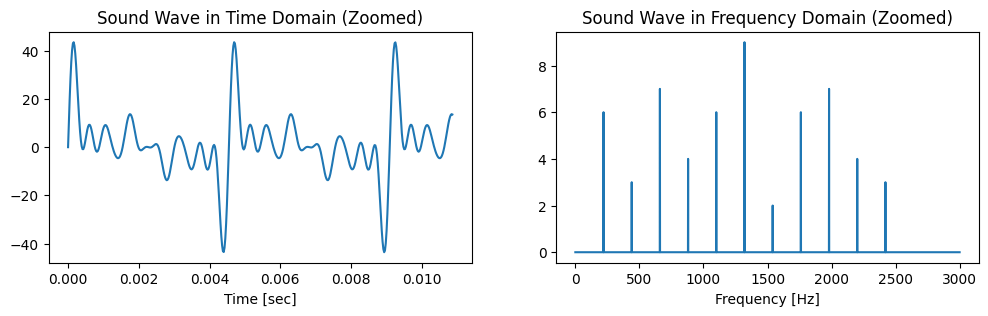

In [167]:
# Example of Time and Freq domain plot
freq = 220 # note frequency
fs = 44100 # sampling rate
duration = 1 # duration of a signal [seconds]
time = np.linspace(0, duration, fs*duration, endpoint=False) # array for time stamps

# Creating signal in time domain
np.random.seed(42)
signal = np.zeros(len(time))
for i in range(1,12):
    amp = np.random.randint(0,10) # using random numbers for amplitudes
    current_freq = i*freq # current harmonic
    signal += amp*np.sin(2 * np.pi * current_freq * time)

# Fourier Transform
N = len(signal)
y_freq = fftfreq(N, 1/fs)[:N//2]  # array for frequency stamps
signal_f = fft(signal) # Signal in frequency domain
signal_f_onesided = 2.0/N * np.abs(signal_f[0:N//2]) # taking positive terms

# Plotting signal in time and frequency domains
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(time[:480], signal[:480])
axes[0].set_title("Sound Wave in Time Domain (Zoomed)")
axes[0].set(xlabel='Time [sec]')
axes[1].plot(y_freq[:3000], signal_f_onesided[:3000])
axes[1].set_title("Sound Wave in Frequency Domain (Zoomed)")
axes[1].set(xlabel='Frequency [Hz]')
plt.show()

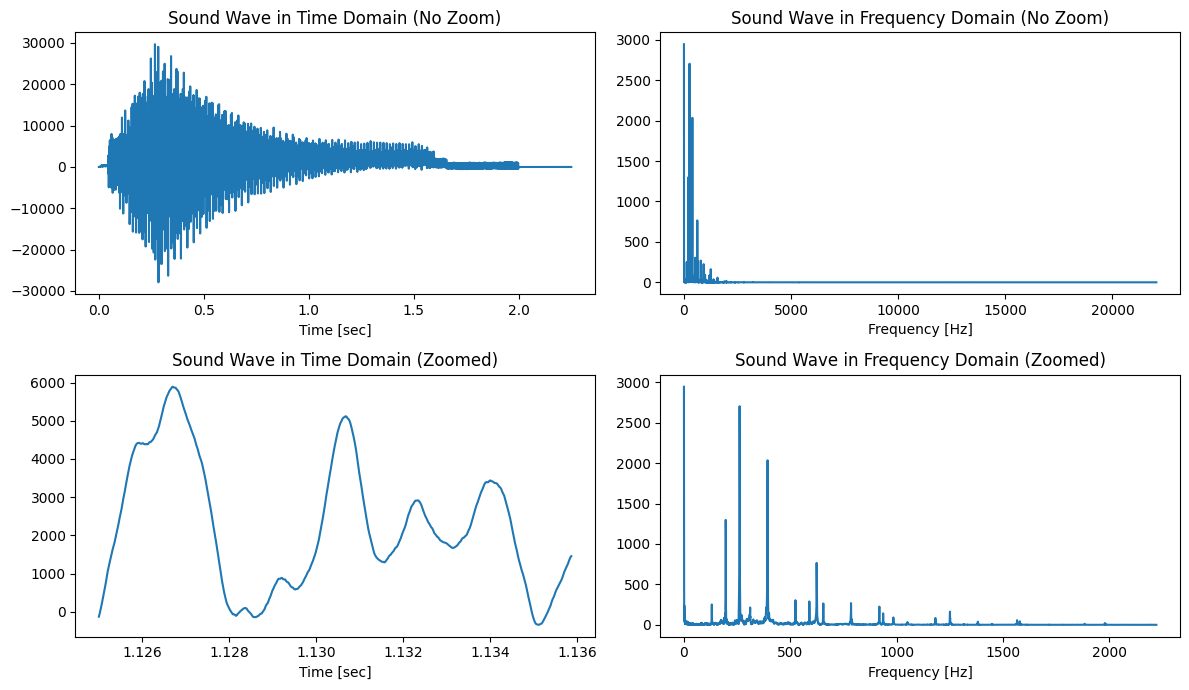

In [168]:
# Example of time and freq domain of our dataset
fs, signal = wavfile.read(minorpiano)
N = len(signal)
time = np.linspace(0., N/fs, N)

# Fourier Transform(Fft method gives us both positive and negative frequency terms)
y_freq = fftfreq(N, 1/fs)[:N//2]  # array for frequency stamps
signal_f = fft(signal) # Signal in frequency domain
signal_f_onesided = 2.0/N * np.abs(signal_f[0:N//2]) # taking positive terms

# Plotting signal in time and frequency domains
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
axes[0,0].plot(time, signal)
axes[0,0].set_title("Sound Wave in Time Domain (No Zoom)")
axes[0,0].set(xlabel='Time [sec]')
axes[0,1].plot(y_freq, signal_f_onesided)
axes[0,1].set_title("Sound Wave in Frequency Domain (No Zoom)")
axes[0,1].set(xlabel='Frequency [Hz]')
axes[1,0].plot(time[(N//2):(N//2+480)], signal[(N//2):(N//2+480)])
axes[1,0].set_title("Sound Wave in Time Domain (Zoomed)")
axes[1,0].set(xlabel='Time [sec]')
axes[1,1].plot(y_freq[:5000], signal_f_onesided[:5000])
axes[1,1].set_title("Sound Wave in Frequency Domain (Zoomed)")
axes[1,1].set(xlabel='Frequency [Hz]')
fig.tight_layout()
plt.show()

## Spectrogram
- Spectrogram is a powerful way to visualize a signal over time at various frequencies
-  It is calculated by splitting the signal into small pieces in time and later applying Fourier transform

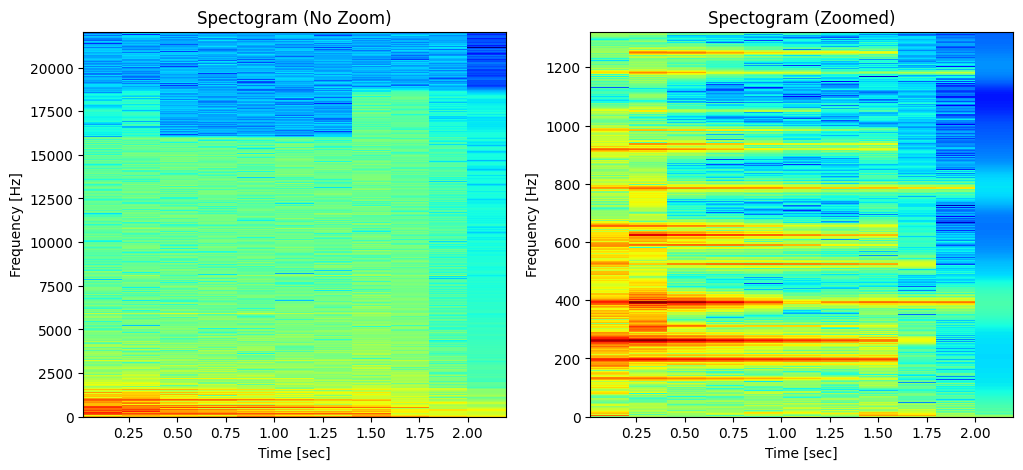

In [169]:
# applying spectrogram
f, t, Sxx = spectrogram(signal, fs, nperseg=10000, nfft = 50000)

# Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].pcolormesh(t, f, np.log(Sxx), cmap="jet")
axes[0].set_title("Spectogram (No Zoom)")
axes[0].set(xlabel='Time [sec]', ylabel='Frequency [Hz]')
axes[1].pcolormesh(t, f[:1500], np.log(Sxx)[:1500,:], cmap="jet")
axes[1].set_title("Spectogram (Zoomed)")
axes[1].set(xlabel='Time [sec]', ylabel='Frequency [Hz]')
plt.show()

## Detection of Harmonic Frequencies
- Harmonic notes will sound when we play base note, and it's frequency is integer multiples of base note frenquency.
- Peaks values in frequency plot are harmonics.
- Base note should have largest amplitude(y_value).
- In this project, we will use the frequency peaks to build a model.

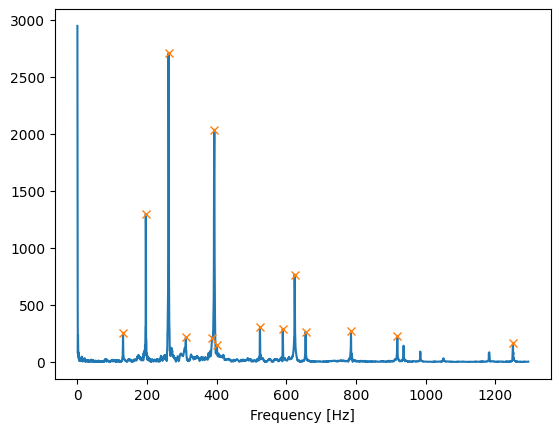

In [170]:
# h: height threshold. I defined as %5 of max value
h = signal_f_onesided.max()*5/100
peaks, _ = find_peaks(signal_f_onesided, distance=10, height = h)

# Assume peaks lower than 50Hz are noises
freq_50_index = np.abs(y_freq - 50).argmin() # finding index for 50 Hz
peaks = peaks[peaks>freq_50_index] # filtering peaks less than 50 Hz
harmonics = y_freq[peaks]

# Plot
i = peaks.max() + 100
plt.plot(y_freq[:i], signal_f_onesided[:i])
plt.plot(y_freq[peaks], signal_f_onesided[peaks], "x")
plt.xlabel('Frequency [Hz]')
plt.show()

In [171]:
# Function to find harmonic peaks, just do the same thing above
def find_harmonics(path, print_peaks=False):
    fs, X = wavfile.read(path)
    N = len(X)
    X_F = fft(X)
    X_F_onesided = 2.0/N * np.abs(X_F[0:N//2])
    freqs = fftfreq(N, 1/fs)[:N//2]
    freqs_50_index = np.abs(freqs - 50).argmin()
    
    h = X_F_onesided.max()*5/100
    peaks, _ = find_peaks(X_F_onesided, distance=10, height = h)
    peaks = peaks[peaks>freqs_50_index]
    harmonics = np.round(freqs[peaks],2)
    
    if print_peaks:
        i = peaks.max() + 100
        plt.plot(freqs[:i], X_F_onesided[:i])
        plt.plot(freqs[peaks], X_F_onesided[peaks], "x")
        plt.xlabel('Frequency [Hz]')
        plt.show()
    return harmonics

# Import Data

In [172]:
# For macOS be aware of ".DS_Store" file!
path = "./data"
data = []
max_harm_length = 0 # i will keep track of max harmonic length for naming columns

for dirname, _, filenames in os.walk(path):
    print(filenames)
    for filename in filenames:
        foldername = os.path.basename(dirname)
        full_path = os.path.join(dirname, filename)
        freq_peaks = find_harmonics(full_path)
        
        max_harm_length = max(max_harm_length, len(freq_peaks))
        
        cur_data = [foldername, filename]
        cur_data.extend([freq_peaks.min(), freq_peaks.max(), len(freq_peaks)])
        cur_data.extend(freq_peaks)
        
        data.append(cur_data)

[]
['Major_500.wav', 'Major_266.wav', 'Major_272.wav', 'Major_299.wav', 'Major_474.wav', 'Major_312.wav', 'Major_306.wav', 'Major_460.wav', 'Major_448.wav', 'Major_28.wav', 'Major_14.wav', 'Major_110.wav', 'Major_104.wav', 'Major_138.wav', 'Major_139.wav', 'Major_105.wav', 'Major_111.wav', 'Major_15.wav', 'Major_29.wav', 'Major_449.wav', 'Major_307.wav', 'Major_461.wav', 'Major_475.wav', 'Major_313.wav', 'Major_298.wav', 'Major_273.wav', 'Major_501.wav', 'Major_267.wav', 'Major_271.wav', 'Major_265.wav', 'Major_259.wav', 'Major_463.wav', 'Major_305.wav', 'Major_311.wav', 'Major_477.wav', 'Major_339.wav', 'Major_17.wav', 'Major_488.wav', 'Major_107.wav', 'Major_113.wav', 'Major_112.wav', 'Major_106.wav', 'Major_16.wav', 'Major_489.wav', 'Major_338.wav', 'Major_310.wav', 'Major_476.wav', 'Major_462.wav', 'Major_304.wav', 'Major_258.wav', 'Major_264.wav', 'Major_270.wav', 'Major_248.wav', 'Major_274.wav', 'Major_260.wav', 'Major_328.wav', 'Major_300.wav', 'Major_466.wav', 'Major_472.wav',

In [173]:

# Column Names for DataFrame:
cols = ["Chord Type", "File Name", "Min Harmonic", "Max Harmonic", "# of Harmonics"]
for i in range(max_harm_length):
    cols.append("Harmonic {}".format(i+1))

# Creating DataFrame
df = pd.DataFrame(data, columns=cols)
print(df.head())

  Chord Type      File Name  Min Harmonic  Max Harmonic  # of Harmonics  \
0      Major  Major_500.wav        116.82       2102.27              27   
1      Major  Major_266.wav        109.78       1949.33              26   
2      Major  Major_272.wav        109.78       1949.33              26   
3      Major  Major_299.wav        147.11        741.78              12   
4      Major  Major_474.wav        116.89       1960.00              25   

   Harmonic 1  Harmonic 2  Harmonic 3  Harmonic 4  Harmonic 5  ...  \
0      116.82      165.45      221.36      233.64      262.27  ...   
1      109.78      165.33      220.00      247.11      278.22  ...   
2      109.78      165.33      220.00      247.11      278.22  ...   
3      147.11      208.44      233.33      262.22      293.78  ...   
4      116.89      175.11      228.44      234.22      294.67  ...   

   Harmonic 29  Harmonic 30  Harmonic 31  Harmonic 32  Harmonic 33  \
0          NaN          NaN          NaN          NaN     

# Data Exploration
- There are 502 Major and 357 Minor datas

In [174]:
df["Chord Type"].value_counts()

Chord Type
Major    502
Minor    357
Name: count, dtype: int64

## Harmonics Distribution
- Plot min and max harmonics on same figure.
- Notice that chord type does not affect distribution.
- Decided not to use "Min Harmonic" and "Max Harmonic" columns to build model

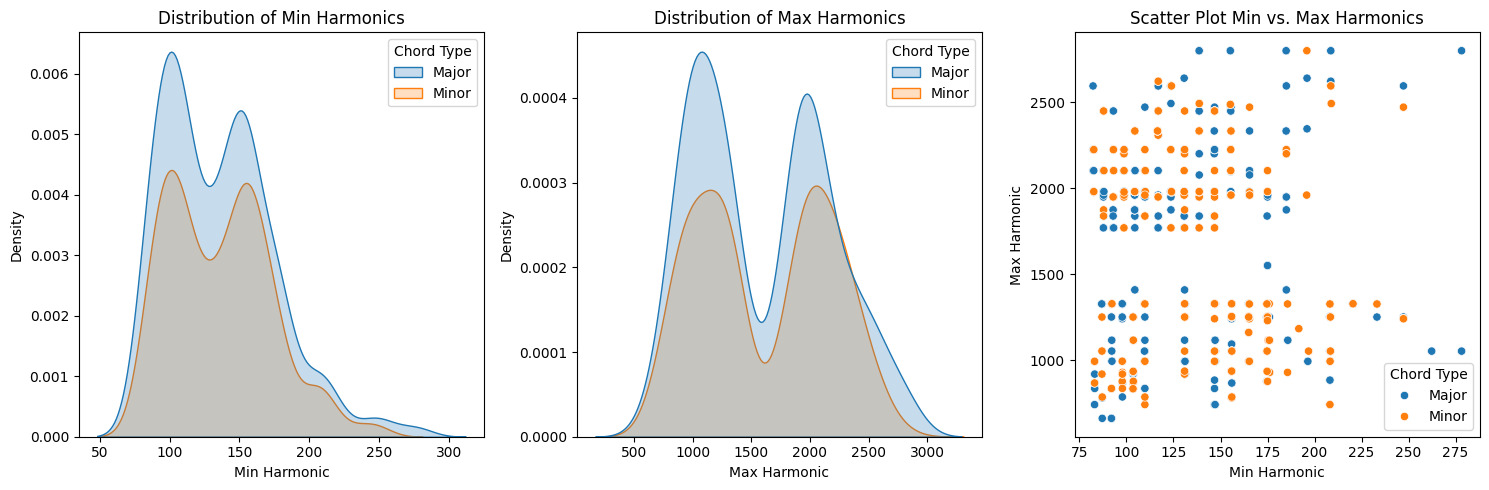

In [175]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(ax=axes[0], data=df, x="Min Harmonic", hue="Chord Type", fill=True)
sns.kdeplot(ax=axes[1], data=df, x="Max Harmonic", hue="Chord Type", fill=True)
sns.scatterplot(ax=axes[2], data=df, x="Min Harmonic", y="Max Harmonic",hue="Chord Type")
axes[0].set_title("Distribution of Min Harmonics")
axes[1].set_title("Distribution of Max Harmonics")
axes[2].set_title("Scatter Plot Min vs. Max Harmonics")
fig.tight_layout()
plt.show()

## Number of Harmonics
- The mean value for the number of harmonics is 20
- The first 8 harmonics are important

In [176]:
df["# of Harmonics"].describe()

count    859.000000
mean      20.389988
std        6.656608
min        8.000000
25%       15.000000
50%       20.000000
75%       25.000000
max       38.000000
Name: # of Harmonics, dtype: float64

In [177]:
print("Number of Missing values:")
miss_values = df.isnull().sum().sort_values(ascending=False)
miss_values[miss_values>0]

Number of Missing values:


Harmonic 38    858
Harmonic 37    857
Harmonic 36    855
Harmonic 35    847
Harmonic 34    839
Harmonic 33    829
Harmonic 32    813
Harmonic 31    793
Harmonic 30    773
Harmonic 29    754
Harmonic 28    720
Harmonic 27    682
Harmonic 26    656
Harmonic 25    611
Harmonic 24    551
Harmonic 23    501
Harmonic 22    471
Harmonic 21    438
Harmonic 20    406
Harmonic 19    382
Harmonic 18    345
Harmonic 17    306
Harmonic 16    241
Harmonic 15    191
Harmonic 14    150
Harmonic 13    108
Harmonic 12     74
Harmonic 11     46
Harmonic 10     20
Harmonic 9      10
dtype: int64

## Feature Engineering on Harmonics
- Difference between Major and Minor comes from the intervals.
- Frequency of notes increases on a logarithmic scale.

In [178]:
df_original = df.copy() # Keeping original of df, I may need later

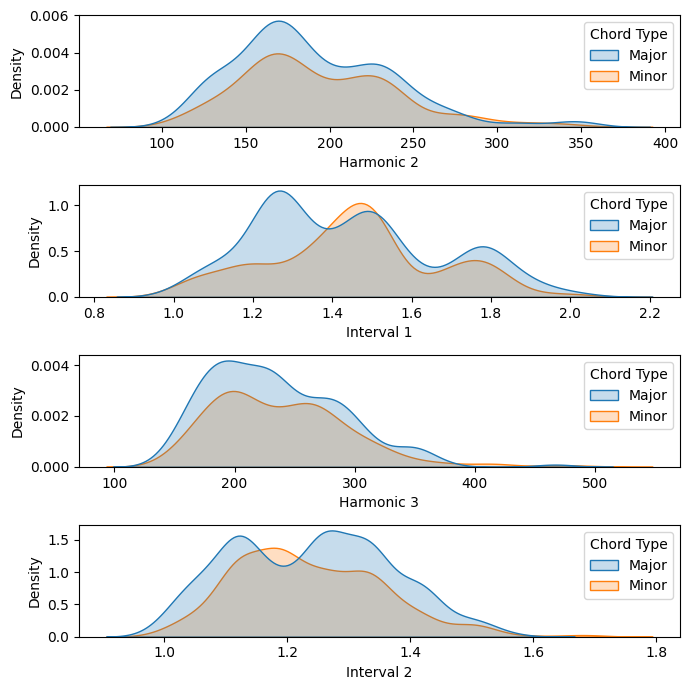

In [179]:
df["Interval 1"] = df["Harmonic 2"].div(df["Harmonic 1"], axis=0)
df["Interval 2"] = df["Harmonic 3"].div(df["Harmonic 2"], axis=0)

fig, axes = plt.subplots(4, 1, figsize=(7, 7))
sns.kdeplot(ax=axes[0], data=df, x="Harmonic 2", hue="Chord Type", fill=True)
sns.kdeplot(ax=axes[1], data=df, x="Interval 1", hue="Chord Type", fill=True)
sns.kdeplot(ax=axes[2], data=df, x="Harmonic 3", hue="Chord Type", fill=True)
sns.kdeplot(ax=axes[3], data=df, x="Interval 2", hue="Chord Type", fill=True)
fig.tight_layout()
plt.show()

In [180]:
df = df_original.copy() # refreshing df

for i in range(1,21):
    curr_interval = "Interval {}".format(i)
    curr_harm = "Harmonic {}".format(i+1)
    prev_harm = "Harmonic {}".format(i)
    df[curr_interval] = df[curr_harm].div(df[prev_harm], axis=0)
    
df.head()

,Chord Type,File Name,Min Harmonic,Max Harmonic,# of Harmonics,Harmonic 1,Harmonic 2,Harmonic 3,Harmonic 4,Harmonic 5,...,Interval 11,Interval 12,Interval 13,Interval 14,Interval 15,Interval 16,Interval 17,Interval 18,Interval 19,Interval 20
0,Major,Major_500.wav,116.82,2102.27,27,116.82,165.45,221.36,233.64,262.27,...,1.264284,1.058943,1.121036,1.041574,1.007756,1.070417,1.121779,1.057726,1.054566,1.046403
1,Major,Major_266.wav,109.78,1949.33,26,109.78,165.33,220.00,247.11,278.22,...,1.187711,1.122396,1.040740,1.014974,1.054444,1.010227,1.185295,1.124893,1.040732,1.067923
2,Major,Major_272.wav,109.78,1949.33,26,109.78,165.33,220.00,247.11,278.22,...,1.187711,1.122396,1.040740,1.075415,1.005360,1.185295,1.124893,1.040732,1.067923,1.008263
3,Major,Major_299.wav,147.11,741.78,12,147.11,208.44,233.33,262.22,293.78,...,1.186222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Major,Major_474.wav,116.89,1960.00,25,116.89,175.11,228.44,234.22,294.67,...,1.192320,1.115118,1.046506,1.067207,1.010662,1.060309,1.120849,1.115858,1.005303,1.194876


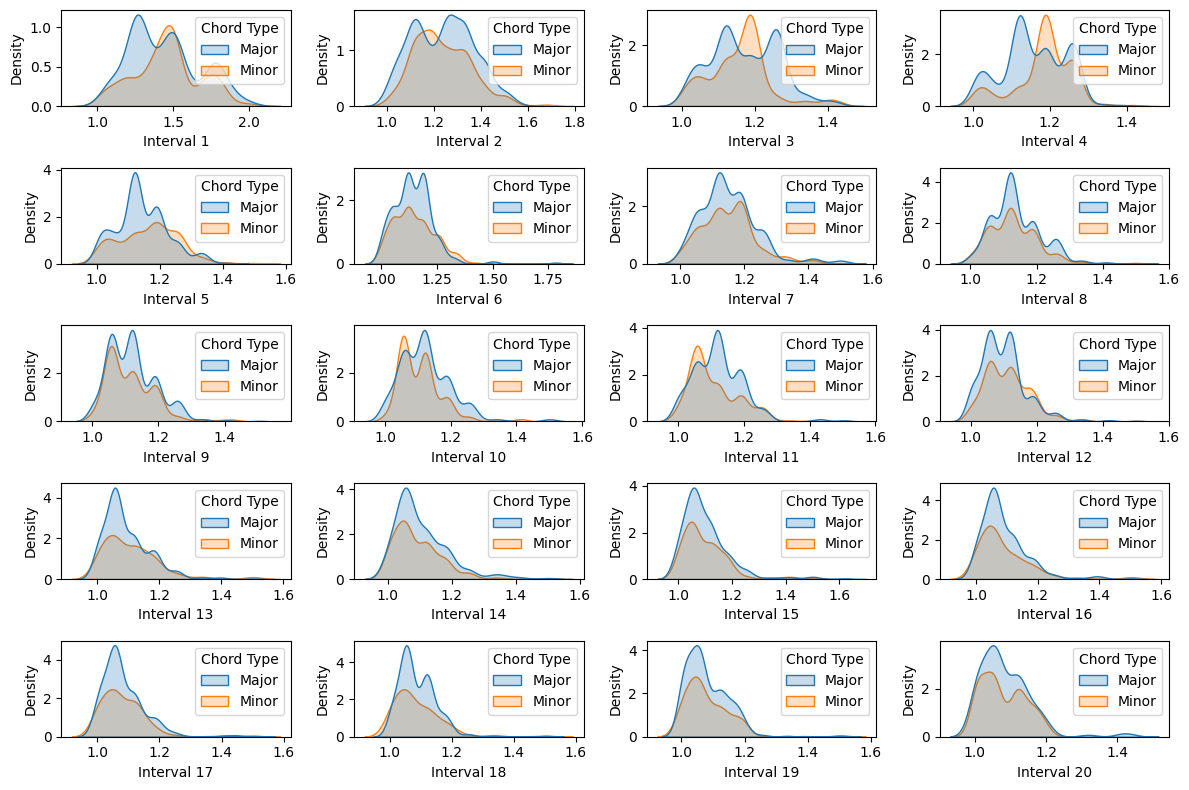

In [181]:
# Lets plot them
fig, axes = plt.subplots(5, 4, figsize=(12, 8))
for i in range(1,21):
    plt.subplot(5, 4, i)
    sns.kdeplot(data=df, x="Interval {}".format(i), hue="Chord Type", fill=True)
fig.tight_layout()
plt.show()

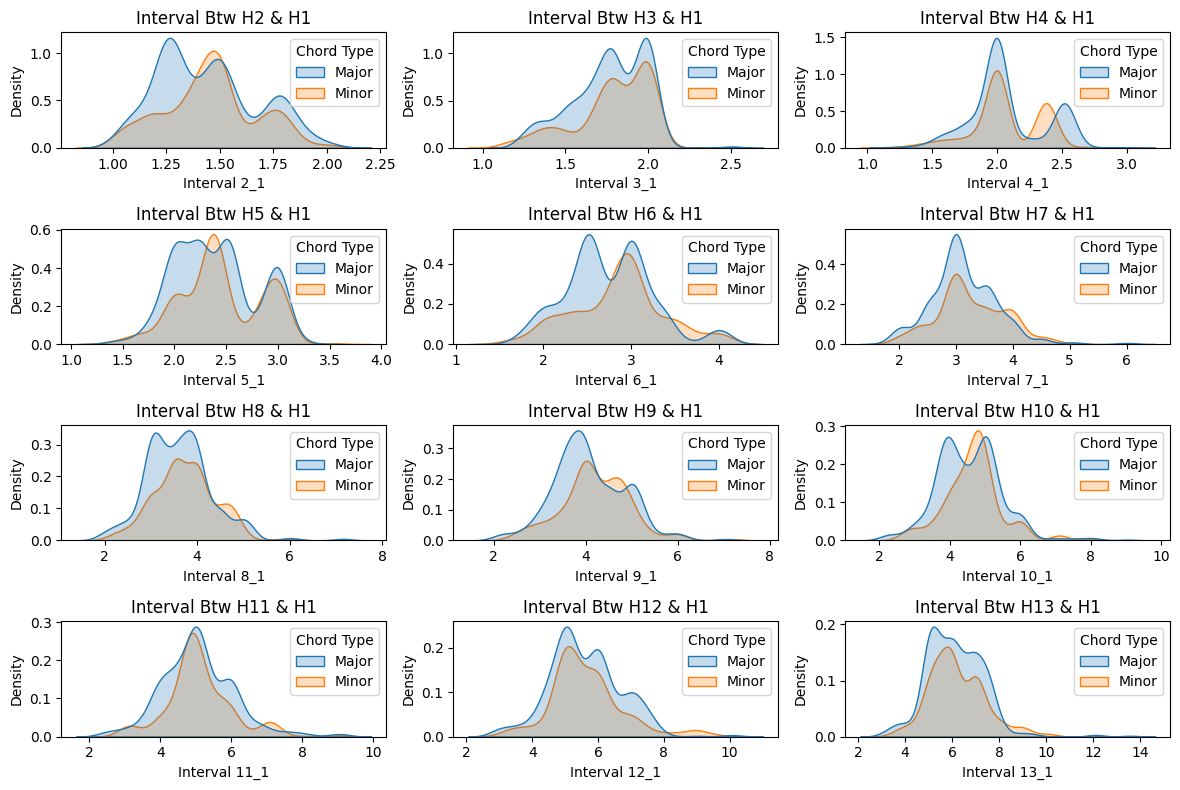

In [182]:
fig, axes = plt.subplots(4, 3, figsize=(12, 8))
for i in range(2,14):
    curr_interval = "Interval {}_1".format(i)
    curr_harm = "Harmonic {}".format(i)
    df[curr_interval] = df[curr_harm].div(df["Harmonic 1"], axis=0)
    
    plt.subplot(4, 3, i-1)
    plt.gca().set_title("Interval Btw H{} & H1".format(i))
    sns.kdeplot(data=df, x=curr_interval, hue="Chord Type", fill=True)
fig.tight_layout()
plt.show()

# Model Building
## Preprocessing of data

In [183]:
# importing packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [184]:
# Replace strings to 1 or 0 to reduce memory use
df["Chord Type"] = df["Chord Type"].replace("Major", 1)
df["Chord Type"] = df["Chord Type"].replace("Minor", 0)

columns = ["Interval 1", "Interval 2", "Interval 3", "Interval 4"]
columns.extend(["Interval 4_1", "Interval 5_1", "Interval 6_1"])
train_X, val_X, train_y, val_y = train_test_split(df[columns], df["Chord Type"], test_size=0.40, random_state=0)

train_X.head()

,Interval 1,Interval 2,Interval 3,Interval 4,Interval 4_1,Interval 5_1,Interval 6_1
585,1.499962,1.195000,1.119546,1.189841,2.006735,2.387694,2.999923
403,1.265351,1.332052,1.170547,1.014932,1.972973,2.002432,2.530703
532,1.189727,1.262474,1.186842,1.121934,1.782636,2.000000,2.249000
104,1.502198,1.304709,1.024930,1.227916,2.008791,2.466626,2.524379
303,1.495606,1.261215,1.058724,1.016059,1.997050,2.029119,2.518953


## Model Selection

In [185]:
lr = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
svc = SVC(random_state=0)
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

score_lr = cross_val_score(lr, train_X, train_y, cv=10).mean()
score_knn = cross_val_score(knn, train_X, train_y, cv=10).mean()
score_svc = cross_val_score(svc, train_X, train_y, cv=10).mean()
score_gnb = cross_val_score(gnb, train_X, train_y, cv=10).mean()
score_dtc = cross_val_score(dtc, train_X, train_y, cv=10).mean()
score_rfc = cross_val_score(rfc, train_X, train_y, cv=10).mean()

print("Cross Val Score for Logistic Regression: {:.2f}".format(score_lr))
print("Cross Val Score for KNeighbors Classifier: {:.2f}".format(score_knn))
print("Cross Val Score for SVC: {:.2f}".format(score_svc))
print("Cross Val Score for Gaussian NB: {:.2f}".format(score_gnb))
print("Cross Val Score for Decision Tree Classifier: {:.2f}".format(score_dtc))
print("Cross Val Score for Random Forest Classifier: {:.2f}".format(score_rfc))

Cross Val Score for Logistic Regression: 0.56
Cross Val Score for KNeighbors Classifier: 0.81
Cross Val Score for SVC: 0.58
Cross Val Score for Gaussian NB: 0.62
Cross Val Score for Decision Tree Classifier: 0.90
Cross Val Score for Random Forest Classifier: 0.92


## Train and Prediction

In [186]:
# Defining my classifier
classifier = RandomForestClassifier(random_state=0)

classifier.fit(train_X, train_y) # training classifier
pred_y = classifier.predict(val_X) # making prediction on validation

cm = confusion_matrix(val_y, pred_y)
acc = accuracy_score(val_y, pred_y)
f1 = f1_score(val_y, pred_y)

print("Confusion Matrix:")
print(cm)
print("Accuracy Score: {:.2f}".format(acc))
print("f1_score: {:.2f}".format(f1))

Confusion Matrix:
[[118  15]
 [ 16 195]]
Accuracy Score: 0.91
f1_score: 0.93
